<a href="https://colab.research.google.com/github/hal-yu/datasci_5_statistics/blob/main/HHA507_W5_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Loading Packages

In [103]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

## Chi-Square Test

### Dataset

Is there an association between hypertension and heart disease?

**Null Hypothesis**: There is no statistically significant relationship between hypertension and presence of heart disease in the population.

**Hypothesis:** There is a statistically significant relationship between hypertension and presence of heart disease in the population.

In [19]:
df1 = pd.read_csv('stroke.csv')
df1

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [21]:
df1 = df1.dropna()
df1

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [22]:
# View counts of hypertension
## F - Female; M - Male
df1['hypertension'].value_counts()

0    4458
1     451
Name: hypertension, dtype: int64

In [23]:
# View counts of heart_disease
## 0 - no presence of heart disease; 1 - patient has heart disease
df1['heart_disease'].value_counts()

0    4666
1     243
Name: heart_disease, dtype: int64

In [24]:
# Create a table of selected columns
contingency_table = pd.crosstab(df1['hypertension'], df1['heart_disease'])
print(contingency_table)

heart_disease     0    1
hypertension            
0              4273  185
1               393   58


In [25]:
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-squared value: 64.20691924994273
P-value: 1.1201467063831507e-15
Degrees of freedom: 1
Expected frequencies:
[[4237.32491342  220.67508658]
 [ 428.67508658   22.32491342]]


#### Interpretation

The chi-square value is approximately 64.21 and a p-value of 1.12^-15. Since the p-value is less than 0.05, we reject the null hypothesis. There is a statistically signfiicant relationship between hypertension and prevalence of heart disease.

## T-Test

### Dataset

Is there a significant difference between the west coast and non-west coast hospital admission rates?

**Null Hypothesis**: There is no significant difference in hospital admission rates between west coast and non-west coast.

**Hypothesis:**  There is a significant difference in hospital admission rates between west coast and non-west coast.

In [64]:
df2 = pd.read_csv('https://raw.githubusercontent.com/hantswilliams/HHA_507_2023/main/WK5/examples/data/cms-chronic-conditions/CC_R20_P08_v10_D18_WWDSE_Cond_complete.csv')
df2

,Bene_Geo_Lvl,Bene_Geo_Desc,Bene_Geo_Cd,Bene_Age_Lvl,Bene_Demo_Lvl,Bene_Demo_Desc,Bene_Cond,Prvlnc,Tot_Mdcr_Stdzd_Pymt_PC,Tot_Mdcr_Pymt_PC,Hosp_Readmsn_Rate,ER_Visits_Per_1000_Benes,is_southern
0,State,Alabama,1.0,All,All,All,Alcohol Abuse,0.0188,25102.3405,23348.6039,0.2413,2184.7557,southern
1,State,Alabama,1.0,All,All,All,Alzheimer's Disease/Dementia,0.1140,25051.8813,22554.0576,0.2119,1410.8355,southern
2,State,Alabama,1.0,All,All,All,Arthritis,0.3897,15827.4930,14403.5780,0.1775,998.3314,southern
3,State,Alabama,1.0,All,All,All,Asthma,0.0499,20560.6948,18914.5834,0.2117,1614.4483,southern
4,State,Alabama,1.0,All,All,All,Atrial Fibrillation,0.0793,25450.4587,23414.3381,0.2268,1450.9822,southern
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,State,Wyoming,56.0,All,All,All,Hypertension,0.4038,14596.5257,16604.1539,0.1563,1032.4567,non-southern
1047,State,Wyoming,56.0,All,All,All,Ischemic Heart Disease,0.2010,17492.8555,20113.1132,0.1772,1248.6805,non-southern
1048,State,Wyoming,56.0,All,All,All,Osteoporosis,0.0480,19099.8147,21672.1663,0.1684,1137.0338,non-southern
1049,State,Wyoming,56.0,All,All,All,Schizophrenia and Other Psychotic Disorders,0.0154,16458.9524,18485.6017,0.2006,2171.5057,non-southern


In [129]:
display.dtypes

Bene_Geo_Desc         object
Bene_Cond             object
Hosp_Readmsn_Rate    float64
west_coast            object
dtype: object

In [138]:
df2['is_west'] = df2['Bene_Geo_Desc'].apply(lambda x: 'west' if x in ['Alaska', 'California', 'Hawaii', 'Oregon', 'Washington'] else 'non-west')

In [159]:
data_is_west = df2[['is_west', 'Bene_Cond', 'Hosp_Readmsn_Rate']]
data_is_west

,is_west,Bene_Cond,Hosp_Readmsn_Rate
0,non-west,Alcohol Abuse,0.2413
1,non-west,Alzheimer's Disease/Dementia,0.2119
2,non-west,Arthritis,0.1775
3,non-west,Asthma,0.2117
4,non-west,Atrial Fibrillation,0.2268
...,...,...,...
1046,non-west,Hypertension,0.1563
1047,non-west,Ischemic Heart Disease,0.1772
1048,non-west,Osteoporosis,0.1684
1049,non-west,Schizophrenia and Other Psychotic Disorders,0.2006


In [173]:
# Selecting Currently Hypertension as condition
hypertension_cond = df2[df2['Bene_Cond'].str.lower() == 'hypertension']

In [177]:
hypertension_cond.loc[:, 'is_west'] = df2['Bene_Geo_Desc'].apply(lambda x: 'west' if x in ['Alaska', 'California', 'Hawaii', 'Oregon', 'Washington'] else 'non-west')


<ipython-input-177-4157d037dfb4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hypertension_cond.loc[:, 'is_west'] = df2['Bene_Geo_Desc'].apply(lambda x: 'west' if x in ['Alaska', 'California', 'Hawaii', 'Oregon', 'Washington'] else 'non-west')


In [185]:
# Now you can filter data based on 'is_west'
west_data = hypertension_cond[hypertension_cond['is_west'] == 'west']['Hosp_Readmsn_Rate']
non_west_data = hypertension_cond[hypertension_cond['is_west'] == 'non-west']['Hosp_Readmsn_Rate']

In [184]:
t_stat, p_val = ttest_ind(west_data, non_west_data, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: -1.9944705859659122
P-value: 0.10235308905420964


In [188]:
# Compute means for west and non-west data
west_mean = west_data.mean()
non_west_mean = non_west_data.mean()
print(f"Mean prevalence for west states: {west_mean}")
print(f"Mean prevalence for non-weststates: {non_west_mean}")

Mean prevalence for west states: 0.16683999999999996
Mean prevalence for non-weststates: 0.18292391304347827


#### Interpretation

The p-value is 0.10, which is greater than 0.05; this means we do not reject the null hypothesis. The t-statistic of -1.9944705859659122 measures the mean difference between the two groups.

## ANOVA

### Dataset

Is there a significant difference in charges between age groups?

**Null Hypothesis**: There is no statistically significant difference in charges among different age groups.

**Hypothesis:** There is a statistically significant difference in charges among different age groups.

In [214]:
df3 = pd.read_csv('insurance.csv')
df3.columns = df3.columns.str.replace(' ', '_').str.replace('/', '_').str.replace('(', '').str.replace(')', '').str.lower()
df3

<ipython-input-214-2153de21ce34>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df3.columns = df3.columns.str.replace(' ', '_').str.replace('/', '_').str.replace('(', '').str.replace(')', '').str.lower()
<ipython-input-214-2153de21ce34>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df3.columns = df3.columns.str.replace(' ', '_').str.replace('/', '_').str.replace('(', '').str.replace(')', '').str.lower()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [215]:
df3.dropna()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [254]:
bin_edges = [20, 30, 40, 50, 60, 70, 80]
bin_labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70+']
df3['age_group'] = pd.cut(df3['age'], bins=bin_edges, labels=bin_labels)

In [255]:
# Vars to keep: age, sex, bmi, smoker, region, charges
filter = df3.groupby(['age_group', 'bmi'])['charges'].sum().reset_index()

In [256]:
model = ols('charges ~ C(age_group)', data=filter).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                    sum_sq      df          F        PR(>F)
C(age_group)  2.448598e+10     5.0  37.969475  5.451904e-38
Residual      4.233031e+11  3282.0        NaN           NaN


#### Interpretation
Since the p-value of 5.45^-38 is less than 0.05,then we reject the null hypothesis, which indicates that there is a statistical difference in charges among different age groups.

## Regression Analysis

### Dataset

Is there a relationship between patient age and their quality of sleep?

**Null Hypothesis**: There is no statistically significant relationship between patient age and their quality of sleep.

**Hypothesis:** There is a statistically significant relationship between patient age and their quality of sleep.

In [262]:
df4 = pd.read_csv('https://raw.githubusercontent.com/hal-yu/datasci_3_eda/main/datasets/sleep_lifestyle_dataset.csv')

In [265]:
# Remove rows with missing data
df4 = df4.dropna()
df4.columns = df4.columns.str.replace(' ', '_').str.replace('/', '_').str.replace('(', '').str.replace(')', '').str.lower()
df4

<ipython-input-265-9fd462959409>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df4.columns = df4.columns.str.replace(' ', '_').str.replace('/', '_').str.replace('(', '').str.replace(')', '').str.lower()
<ipython-input-265-9fd462959409>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df4.columns = df4.columns.str.replace(' ', '_').str.replace('/', '_').str.replace('(', '').str.replace(')', '').str.lower()


,person_id,gender,age,occupation,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,bmi_category,blood_pressure,heart_rate,daily_steps,sleep_disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [267]:
# Vars to keep:
filtered = df4[['age', 'quality_of_sleep']]

## Defining the variables
x = df4['age']
y = df4['quality_of_sleep']

# Fitting Regression Model
model = sm.OLS(y, x).fit()

                                 OLS Regression Results                                
Dep. Variable:       quality_of_sleep   R-squared (uncentered):                   0.965
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                          1.014e+04
Date:                Sat, 14 Oct 2023   Prob (F-statistic):                   1.48e-272
Time:                        03:32:07   Log-Likelihood:                         -655.32
No. Observations:                 374   AIC:                                      1313.
Df Residuals:                     373   BIC:                                      1317.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

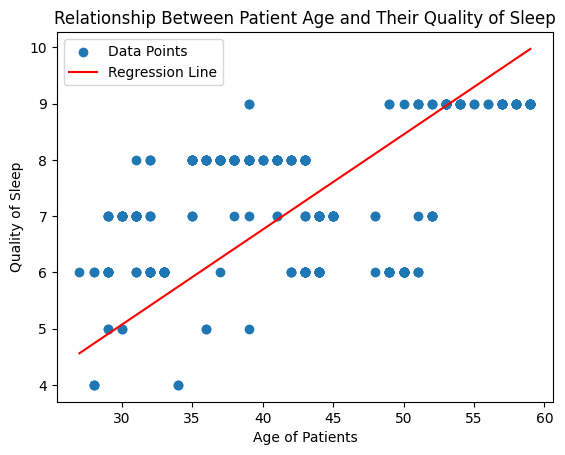

In [268]:
print(model.summary())

plt.scatter(df4['age'], df4['quality_of_sleep'], label='Data Points')
plt.plot(df4['age'], model.predict(x), color='red', label='Regression Line')
plt.xlabel('Age of Patients')
plt.ylabel('Quality of Sleep')
plt.title('Relationship Between Patient Age and Their Quality of Sleep')
plt.legend()
plt.show()

#### Interpretation

There seems to be a positive correlation between patient age and their average glcuose levels. Since my F-statistic is close to 0 and P>|t|, it is likely that my data is signficant. This means that there is a significant correlation between age of patients and quality of sleep.